In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./final_SET.csv')

In [3]:
df.head()


,card_filename,fill,number,shape,color,0,1,2,3,4,...,5240,5241,5242,5243,5244,5245,5246,5247,5248,5249
0,SET0007,striped,3,squiggle,red,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,SeT0063.jpg,outlined,1,oval,purple,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,SeT0077.jpg,outlined,2,diamond,purple,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,SeT0076.jpg,striped,2,diamond,purple,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,SeT0062.jpg,outlined,3,diamond,purple,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [4]:
photos_df = df.drop(columns=['card_filename', 'fill','number','shape','color'])

In [5]:
photos_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,5240,5241,5242,5243,5244,5245,5246,5247,5248,5249
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [6]:
photos_array = np.array(photos_df)

In [7]:
photos_array.shape

(81, 5250)

In [8]:
# rescaling so that it's 0 to 1 instead of 0 to 255
photos_array = photos_array.astype('float32')
photos_array /= 255

In [9]:
photos_array[0]

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [10]:
photos = [x.reshape(35, 50, 3) for x in photos_array]

In [11]:
photos = np.array(photos)

In [12]:
photos.shape

(81, 35, 50, 3)

### generating more data

In [13]:
dg = ImageDataGenerator()

In [14]:
something = dg.fit(X_train)

NameError: name 'X_train' is not defined

In [15]:
X_train.shape

NameError: name 'X_train' is not defined

In [71]:
something

## First neural net, to predict shape

In [16]:
label = np.array(df['shape'])

In [17]:
# Since we're doing multiclass classification, we actually need to one-hot
# encode y to be an n-by-10 matrix. Keras doesn't know we're doing classification!
oh = OneHotEncoder(
    sparse=False,
    dtype=int,
    categories="auto"
)
y = oh.fit_transform(label.reshape(-1, 1))

In [18]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(photos, y, random_state = 5)

In [25]:
X_train

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]],


       [[[1., 1., 1.],
         [1., 1., 1.],
         [1., 

In [26]:
X_train.shape

(60, 35, 50, 3)

## Feed forward net

In [19]:
# create topology
model = Sequential()
model.add(Flatten(input_shape = (35, 50, 3)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(3, activation="softmax"))

# compile
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["acc"]
)

In [20]:
# Fit model on training data.
history = model.fit(X_train,
                    y_train, 
                    batch_size=256,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    verbose=1)

Epoch 1/100
1/1 [==============================] - 0s 164ms/step - loss: 1.2705 - acc: 0.3167 - val_loss: 5.1828 - val_acc: 0.6190
Epoch 2/100
1/1 [==============================] - 0s 25ms/step - loss: 9.0046 - acc: 0.2333 - val_loss: 2.4532 - val_acc: 0.6190
Epoch 3/100
1/1 [==============================] - 0s 30ms/step - loss: 3.5458 - acc: 0.2333 - val_loss: 1.5963 - val_acc: 0.1429
Epoch 4/100
1/1 [==============================] - 0s 36ms/step - loss: 1.5347 - acc: 0.4000 - val_loss: 1.2443 - val_acc: 0.1429
Epoch 5/100
1/1 [==============================] - 0s 38ms/step - loss: 1.3554 - acc: 0.4000 - val_loss: 1.2252 - val_acc: 0.1429
Epoch 6/100
1/1 [==============================] - 0s 64ms/step - loss: 1.1546 - acc: 0.4000 - val_loss: 1.3958 - val_acc: 0.2381
Epoch 7/100
1/1 [==============================] - 0s 44ms/step - loss: 1.0914 - acc: 0.3667 - val_loss: 1.7109 - val_acc: 0.2381
Epoch 8/100
1/1 [==============================] - 0s 44ms/step - loss: 1.2838 - acc: 0.3

1/1 [==============================] - 0s 37ms/step - loss: 0.5358 - acc: 0.9833 - val_loss: 0.7381 - val_acc: 0.8571
Epoch 64/100
1/1 [==============================] - 0s 46ms/step - loss: 0.5268 - acc: 0.9333 - val_loss: 0.7433 - val_acc: 0.8095
Epoch 65/100
1/1 [==============================] - 0s 37ms/step - loss: 0.5185 - acc: 0.9333 - val_loss: 0.7314 - val_acc: 0.8571
Epoch 66/100
1/1 [==============================] - 0s 41ms/step - loss: 0.5101 - acc: 0.9333 - val_loss: 0.7057 - val_acc: 0.8571
Epoch 67/100
1/1 [==============================] - 0s 37ms/step - loss: 0.5015 - acc: 0.9667 - val_loss: 0.6820 - val_acc: 0.9524
Epoch 68/100
1/1 [==============================] - 0s 37ms/step - loss: 0.4935 - acc: 0.9833 - val_loss: 0.6756 - val_acc: 1.0000
Epoch 69/100
1/1 [==============================] - 0s 39ms/step - loss: 0.4854 - acc: 0.9833 - val_loss: 0.6731 - val_acc: 1.0000
Epoch 70/100
1/1 [==============================] - 0s 41ms/step - loss: 0.4775 - acc: 0.9833 - 

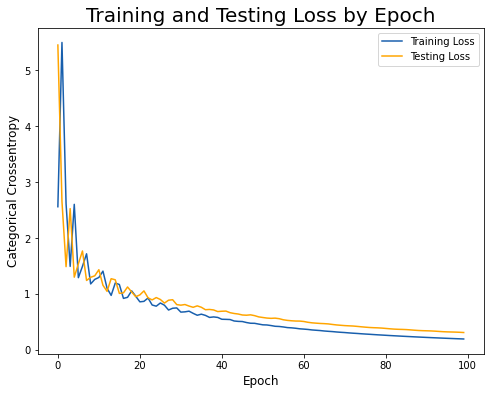

In [37]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(8, 6))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 20)
plt.xlabel('Epoch', fontsize = 12)
plt.ylabel('Categorical Crossentropy', fontsize = 12)
#plt.xticks(np.arange(100), np.arange(100))

plt.legend(fontsize = 10);

## Convolutional neural net

In [21]:
cnn_model = Sequential()
# Adding  a convolutional layer:
cnn_model.add(Conv2D(
    filters = 6, # should do more like 32
    kernel_size = (3,3), # Size of filters
    activation = 'relu',
    input_shape = (35, 50, 3)
))
cnn_model.add(MaxPooling2D(pool_size = (2,2))) # dimensions of region of pooling
cnn_model.add(Conv2D(16, kernel_size=(3, 3), activation="relu"))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(3, activation='softmax'))


In [22]:
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [23]:
# Fit model on training data
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size=256,
                        validation_data=(X_test, y_test),
                        epochs=100,
                        verbose=1)

Epoch 1/100
1/1 [==============================] - 0s 110ms/step - loss: 1.1319 - accuracy: 0.3833 - val_loss: 1.6638 - val_accuracy: 0.1429
Epoch 2/100
1/1 [==============================] - 0s 32ms/step - loss: 1.1380 - accuracy: 0.4000 - val_loss: 1.5217 - val_accuracy: 0.1429
Epoch 3/100
1/1 [==============================] - 0s 37ms/step - loss: 1.0700 - accuracy: 0.4500 - val_loss: 1.2996 - val_accuracy: 0.3333
Epoch 4/100
1/1 [==============================] - 0s 43ms/step - loss: 1.0300 - accuracy: 0.6333 - val_loss: 1.1271 - val_accuracy: 0.2381
Epoch 5/100
1/1 [==============================] - 0s 41ms/step - loss: 1.0226 - accuracy: 0.6167 - val_loss: 1.0666 - val_accuracy: 0.3810
Epoch 6/100
1/1 [==============================] - 0s 45ms/step - loss: 1.0217 - accuracy: 0.6833 - val_loss: 1.0855 - val_accuracy: 0.3810
Epoch 7/100
1/1 [==============================] - 0s 50ms/step - loss: 0.9984 - accuracy: 0.7167 - val_loss: 1.1480 - val_accuracy: 0.3333
Epoch 8/100
1/1 [==

1/1 [==============================] - 0s 28ms/step - loss: 0.0590 - accuracy: 0.9833 - val_loss: 0.0344 - val_accuracy: 1.0000
Epoch 60/100
1/1 [==============================] - 0s 28ms/step - loss: 0.0572 - accuracy: 0.9833 - val_loss: 0.0322 - val_accuracy: 1.0000
Epoch 61/100
1/1 [==============================] - 0s 36ms/step - loss: 0.0555 - accuracy: 0.9833 - val_loss: 0.0304 - val_accuracy: 1.0000
Epoch 62/100
1/1 [==============================] - 0s 29ms/step - loss: 0.0540 - accuracy: 0.9833 - val_loss: 0.0289 - val_accuracy: 1.0000
Epoch 63/100
1/1 [==============================] - 0s 31ms/step - loss: 0.0526 - accuracy: 0.9833 - val_loss: 0.0272 - val_accuracy: 1.0000
Epoch 64/100
1/1 [==============================] - 0s 29ms/step - loss: 0.0513 - accuracy: 0.9833 - val_loss: 0.0253 - val_accuracy: 1.0000
Epoch 65/100
1/1 [==============================] - 0s 30ms/step - loss: 0.0499 - accuracy: 0.9833 - val_loss: 0.0236 - val_accuracy: 1.0000
Epoch 66/100
1/1 [========

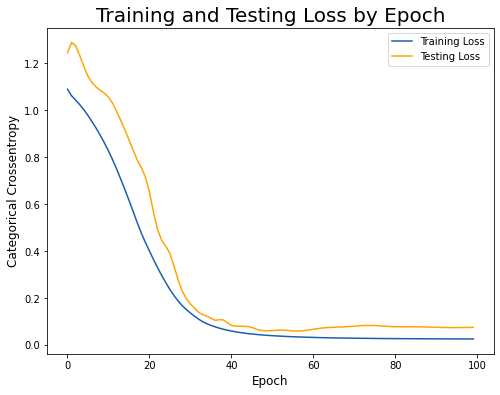

In [63]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(8, 6))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 20)
plt.xlabel('Epoch', fontsize = 12)
plt.ylabel('Categorical Crossentropy', fontsize = 12)
#plt.xticks(np.arange(100), np.arange(100))

plt.legend(fontsize = 10);

In [24]:
history.output

AttributeError: 'History' object has no attribute 'output'